<a href="https://colab.research.google.com/github/icezyf/data_projects/blob/main/Baby's_Activities_Analysis_and_Failure_Modeling_Discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Baby's Actitivies Analysis**  
For all those new parents like me, taking care of a baby, especially a newborn one, is absolutely challenging and exhausting because we are adapting each other and the baby is also trying to find little feet. We do not know when the baby is going to pee, poop, sleep, ill, cry for starving, etc. 

In this project, I am offering analysis, visualizations and simple predictions of my baby Timmons's activities as references for new parents. It's more understanding and adaptive for new mothers to breastfeed babies as well as pamper themselves. 

I logged everything about Timmons into [Baby Tracker App](https://nighp.com/babytracker/) for his first 6 months. This App enables users to download all records in desired formats, such as csv. However, the sizes of all datasets are very tiny so that I won't deep dive to develop into comprehensive modeling. Therefore, this project is more focusing on **OLAP and visualizations**. Other than that, people always focus on how to achieve successful models that are able to accurately predict but they miss out a very essential point that is failure analysis. Here comes with the angle of small datasets causing failure as well.


### **Content**
0. Package and Data Loading

1. Data Preprocessing

2. Data Exploration

3. Feature Engineering

4. Supervised Model Training

5. Unsupervised Model for Text



#0. Package and Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv"

pump.csv	     Timmons_medication.csv	 Timmons_other_Feed.csv
Timmons_diaper.csv   Timmons_nursing.csv	 Timmons_pumped.csv
Timmons_formula.csv  Timmons_other_activity.csv  Timmons_sleep.csv


In [ ]:
pumpDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/pump.csv")
diaperDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_diaper.csv")
formulaDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_formula.csv")
medDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_medication.csv")
nursingDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_nursing.csv")
activityDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_other_activity.csv")
feedsDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_other_Feed.csv")
pumpedDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_pumped.csv")
sleepDF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/baby tracking csv/Timmons_sleep.csv")

**Understand the Raw Data**

In [ ]:
# pumped breast milk
pumpDF.head()

,Time,Start Side,Left duration (min),Right duration (min),Total Duration (min),Left amount (oz.),Right amount (oz.),Total amount (oz.),Note
0,"2/16/20, 6:50 PM",NaN,18.0,18.0,36.0,0.75,0.75,1.50,NaN
1,"2/13/20, 2:43 PM",NaN,15.0,15.0,30.0,0.50,0.50,1.00,NaN
2,"2/11/20, 10:12 PM",NaN,15.0,15.0,30.0,0.25,0.50,0.75,NaN
3,"2/11/20, 12:40 PM",NaN,17.0,17.0,34.0,0.50,0.50,1.00,NaN
4,"2/8/20, 8:19 PM",NaN,17.0,17.0,34.0,1.00,0.50,1.50,NaN


In [ ]:
print(diaperDF.head())
print(diaperDF.groupby('Status').count().sort_values(by='Time', ascending=False))

      Baby              Time Status Note
0  Timmons  5/23/20, 9:15 PM    Wet  NaN
1  Timmons  5/23/20, 8:26 AM    Wet  NaN
2  Timmons  5/23/20, 2:42 AM    Wet  NaN
3  Timmons  5/22/20, 9:03 PM    Wet  NaN
4  Timmons  5/22/20, 4:47 PM  Mixed  NaN
        Baby  Time  Note
Status                  
Wet     1041  1041     1
Mixed    197   197     0
Dirty     27    27     0
Dry        3     3     0


In [ ]:
formulaDF.head()

,Baby,Time,Amount (oz.),Note
0,Timmons,"5/23/20, 9:10 PM",5.0,NaN
1,Timmons,"5/23/20, 8:20 AM",6.0,NaN
2,Timmons,"5/23/20, 2:45 AM",3.0,NaN
3,Timmons,"5/22/20, 9:30 PM",5.0,NaN
4,Timmons,"5/22/20, 11:30 AM",5.0,NaN


In [ ]:
# taking medicines
print(medDF.head())
print(medDF.groupby('Medication').count().sort_values(by='Time', ascending=False))

      Baby              Time   Medication Description Amount  Note
0  Timmons   5/6/20, 7:55 PM  Gripe Water       Colic   5 ml   NaN
1  Timmons  1/30/20, 3:45 AM  Gripe Water       Colic   5 ml   NaN
2  Timmons  1/27/20, 7:59 AM  Gripe Water       Colic   5 ml   NaN
3  Timmons  1/25/20, 5:39 AM  Gripe Water       Colic   5 ml   NaN
4  Timmons  1/23/20, 4:41 AM  Gripe Water       Colic   5 ml   NaN
                          Baby  Time  Description  Amount  Note
Medication                                                     
Gripe Water                 26    26           26      26     0
Eye Antibiotics Ointment    15    15            0      15     0
Tylenol Infant               1     1            0       1     0


In [ ]:
# breastfeeding
nursingDF.head()

,Baby,Time,Start Side,Left duration (min),Right duration (min),Total Duration (min),Note
0,Timmons,"2/21/20, 10:09 PM",Left,7,0,0,NaN
1,Timmons,"2/21/20, 9:35 PM",Right,0,34,0,NaN
2,Timmons,"2/15/20, 3:18 PM",Left,0,30,0,NaN
3,Timmons,"2/15/20, 3:09 PM",Left,8,0,0,NaN
4,Timmons,"2/15/20, 6:13 AM",Left,16,0,0,NaN


In [ ]:
print(activityDF.head())
print(activityDF.groupby('Other activity').count().sort_values(by='Time', ascending=False))
# drop this dataframe as not enough orders

      Baby              Time Other activity  Duration(minutes) Note
0  Timmons   1/4/20, 6:44 AM    Medications                  1  NaN
1  Timmons   1/2/20, 8:01 PM    Medications                  1  NaN
2  Timmons   1/2/20, 6:17 AM    Medications                  1  NaN
3  Timmons  1/1/20, 10:32 PM    Medications                  1  NaN
4  Timmons   1/1/20, 5:30 AM    Medications                  1  NaN
                          Baby  Time  Duration(minutes)  Note
Other activity                                               
Medications                 51    51                 51     4
Wash PatPat                  6     6                  6     0
Play Time                    5     5                  5     0
Bath Time                    4     4                  4     0
Not Enough Records Today     1     1                  1     0
Tummy Time                   1     1                  1     0


In [ ]:
print(feedsDF.head())
print(feedsDF.groupby('Other Food').count().sort_values('Time', ascending=False))

      Baby              Time  ...     Unit                                      Note
0  Timmons  5/23/20, 6:30 PM  ...  Scoops                                Apple, Date
1  Timmons  5/23/20, 6:30 PM  ...       oz                                       NaN
2  Timmons  5/23/20, 6:30 PM  ...       oz                                       NaN
3  Timmons  5/23/20, 2:30 PM  ...  Scoops   Potato, Tomato, Celery, Apple, Broccoli 
4  Timmons  5/23/20, 2:30 PM  ...       oz                                       NaN

[5 rows x 6 columns]
            Baby  Time  Amount  Unit  Note
Other Food                                
Cereal        96    96      96    96    82
Fruit         59    59      59    59     1
Veggies       59    59      59    59     3


In [ ]:
# drank the pumped breast milk
print(pumpedDF.head())

      Baby               Time  Amount (oz.)  Note
0  Timmons   2/27/20, 6:13 PM          1.00   NaN
1  Timmons   2/22/20, 9:00 PM          1.00   NaN
2  Timmons   2/18/20, 6:04 PM          2.70   NaN
3  Timmons  2/11/20, 11:15 PM          2.70   NaN
4  Timmons   2/8/20, 10:00 PM          4.73   NaN


In [ ]:
sleepDF.head()

,Baby,Time,Duration(minutes),Note
0,Timmons,"5/23/20, 9:43 PM",503,NaN
1,Timmons,"5/23/20, 7:00 PM",26,NaN
2,Timmons,"5/23/20, 9:30 AM",90,NaN
3,Timmons,"5/23/20, 3:00 AM",287,NaN
4,Timmons,"5/22/20, 9:40 PM",300,NaN


#1. Data Preprocessing

In [ ]:
pump = pumpDF.drop(['Start Side', 'Note'], axis=1)
diaper = diaperDF.drop(['Baby', 'Note'], axis=1)
formula = formulaDF.drop(['Baby', 'Note'], axis=1)
med = medDF.drop(['Baby', 'Note'], axis=1)
nursing = nursingDF.drop(['Baby', 'Start Side', 'Note'], axis=1)
feeds = feedsDF.drop(['Baby'], axis=1)
pumped = pumpedDF.drop(['Baby', 'Note'], axis=1)
sleep = sleepDF.drop(['Baby', 'Note'], axis=1)

In [ ]:
print(pump.info())
print("**************************************")
print(formula.info())
print("**************************************")
print(nursing.info())
print("**************************************")
print(pumped.info())
print("**************************************")
print(diaper.info())
print("**************************************")
print(med.info())
print("**************************************")
print(feeds.info())
print("**************************************")
print(sleep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  172 non-null    object 
 1   Left duration (min)   166 non-null    float64
 2   Right duration (min)  166 non-null    float64
 3   Total Duration (min)  166 non-null    float64
 4   Left amount (oz.)     172 non-null    float64
 5   Right amount (oz.)    168 non-null    float64
 6   Total amount (oz.)    172 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB
None
**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          950 non-null    object 
 1   Amount (oz.)  950 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.0+ KB
None
*******

In [ ]:
pump = pump.rename(columns={'Left duration (min)':'LeftDur', 'Right duration (min)':'RightDur', 'Total Duration (min)':'TotalDur',\
                                'Left amount (oz.)':'LeftAmt', 'Right amount (oz.)':'RightAmt', 'Total amount (oz.)':'TotalAmt'})
formula = formula.rename(columns={'Amount (oz.)':'Amount'})
nursing = nursing.rename(columns={'Left duration (min)':'LeftDur', 'Right duration (min)':'RightDur', 'Total Duration (min)':'TotalDur'})
pumped = pumped.rename(columns={'Amount (oz.)':'Amount'})
feeds = feeds.rename(columns={'Other Food':'OtherFood'})
sleep = sleep.rename(columns={'Duration(minutes)':'Dur'})                                               

**Extract Year, Month, Day, Day of Week, Hour, Minute from Time**

In [ ]:
pump['Time'] = pd.to_datetime(pump['Time'])
formula['Time'] = pd.to_datetime(formula['Time'])
nursing['Time'] = pd.to_datetime(nursing['Time'])
pumped['Time'] = pd.to_datetime(pumped['Time'])
diaper['Time'] = pd.to_datetime(diaper['Time'])
med['Time'] = pd.to_datetime(med['Time'])
feeds['Time'] = pd.to_datetime(feeds['Time'])
sleep['Time'] = pd.to_datetime(sleep['Time'])

In [ ]:
def extractTime(df):
  df['Year'] = df['Time'].dt.year
  df['Month']= df['Time'].dt.month
  df['Day'] = df['Time'].dt.day
  df['DoW'] = df['Time'].dt.dayofweek
  df['Hour'] = df['Time'].dt.hour
  df['Minute'] = df['Time'].dt.minute
  

extractTime(pump)
extractTime(formula)
extractTime(nursing)
extractTime(pumped)
extractTime(diaper)
extractTime(med)
extractTime(feeds)
extractTime(sleep)

# take an look of one example
pump.head()

,Time,LeftDur,RightDur,TotalDur,LeftAmt,RightAmt,TotalAmt,Year,Month,Day,DoW,Hour,Minute
0,2020-02-16 18:50:00,18.0,18.0,36.0,0.75,0.75,1.50,2020,2,16,6,18,50
1,2020-02-13 14:43:00,15.0,15.0,30.0,0.50,0.50,1.00,2020,2,13,3,14,43
2,2020-02-11 22:12:00,15.0,15.0,30.0,0.25,0.50,0.75,2020,2,11,1,22,12
3,2020-02-11 12:40:00,17.0,17.0,34.0,0.50,0.50,1.00,2020,2,11,1,12,40
4,2020-02-08 20:19:00,17.0,17.0,34.0,1.00,0.50,1.50,2020,2,8,5,20,19


- **Extract Numbers from 'Amount' Column from feeds and med Dataframes**
- **Convert 'object' type into 'float64'**

In [ ]:
import re as re
def find_number(text):
  num = re.findall(r'[0-9]+', text)
  return " ".join(num)
feeds['Amount']=feeds['Amount'].apply(lambda x: find_number(x))
feeds['Amount'] = pd.to_numeric(feeds['Amount'], errors='coerce')
feeds['Amount'].dtypes

dtype('float64')

In [ ]:
# # extract number from Amount column in med dataframe
def find_number(text):
  num = re.findall(r'[0-9]+', text)
  return " ".join(num)
med['Amount']=med['Amount'].apply(lambda x: find_number(x))
med['Amount'] = pd.to_numeric(med['Amount'], errors='coerce')
med['Amount'].dtypes

dtype('float64')

#2. Data Exploration

##2.1 Feeding

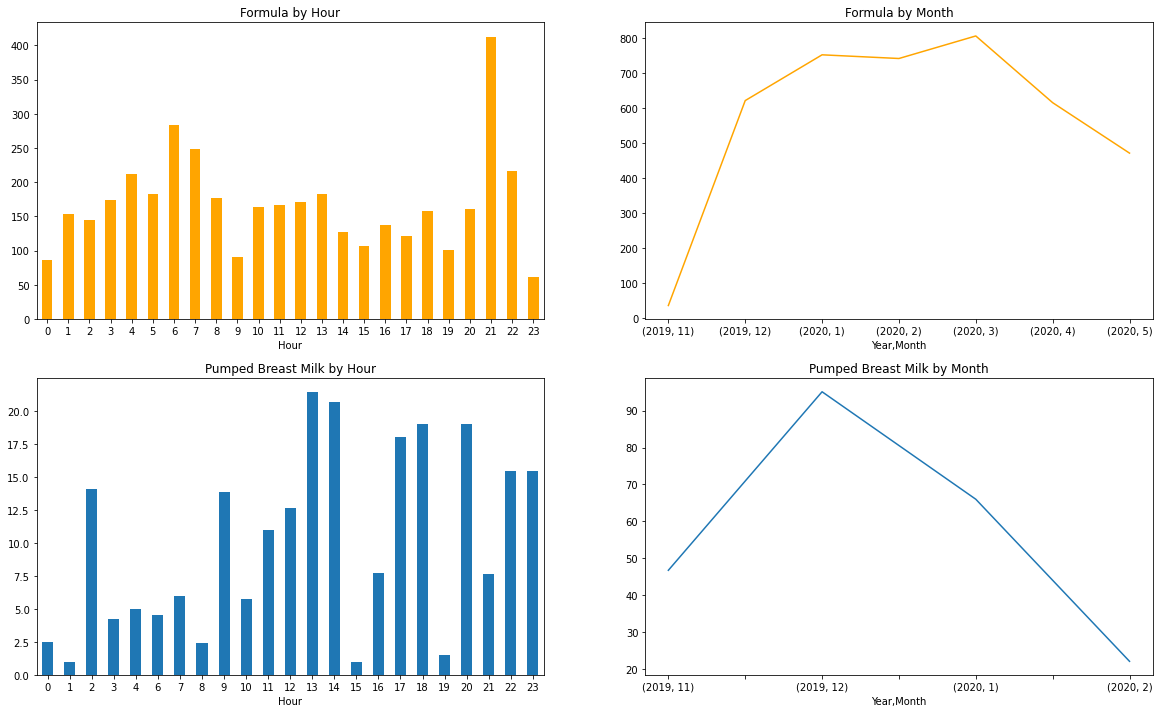

In [ ]:
_,axes = plt.subplots(2,2, figsize=[20, 12])
formula.groupby('Hour').Amount.sum().plot(kind='bar', rot=0, color='Orange',ax=axes[0][0])
formula.groupby(['Year', 'Month']).Amount.sum().plot(color='Orange', ax=axes[0][1])
pumped.groupby('Hour').Amount.sum().plot(kind='bar', rot=0, ax=axes[1][0])
pumped.groupby(['Year', 'Month']).Amount.sum().plot(ax=axes[1][1])

nursing.groupby(nursing.Hour)
axes[0][0].set_title('Formula by Hour')
axes[0][1].set_title('Formula by Month')
axes[1][0].set_title('Pumped Breast Milk by Hour')
axes[1][1].set_title('Pumped Breast Milk by Month')
plt.show()

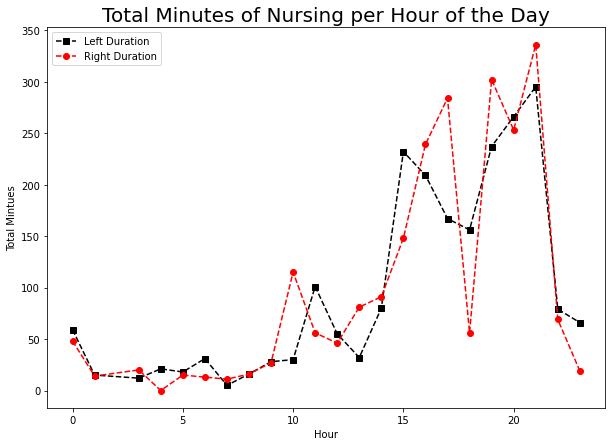

In [ ]:
# total minutes of nursing per hour of the day
plt.figure(figsize=(10, 7))
plt.plot(nursing.groupby('Hour')['LeftDur'].sum(), color = 'black', ls = '--', marker = 's',label = 'Left Duration')
plt.plot(nursing.groupby('Hour')['RightDur'].sum(), color = 'red', ls = '--', marker = 'o',label = 'Right Duration')
plt.xlabel('Hour')
plt.ylabel('Total Mintues')
plt.title('Total Minutes of Nursing per Hour of the Day', fontsize=20)
plt.legend()
plt.show()

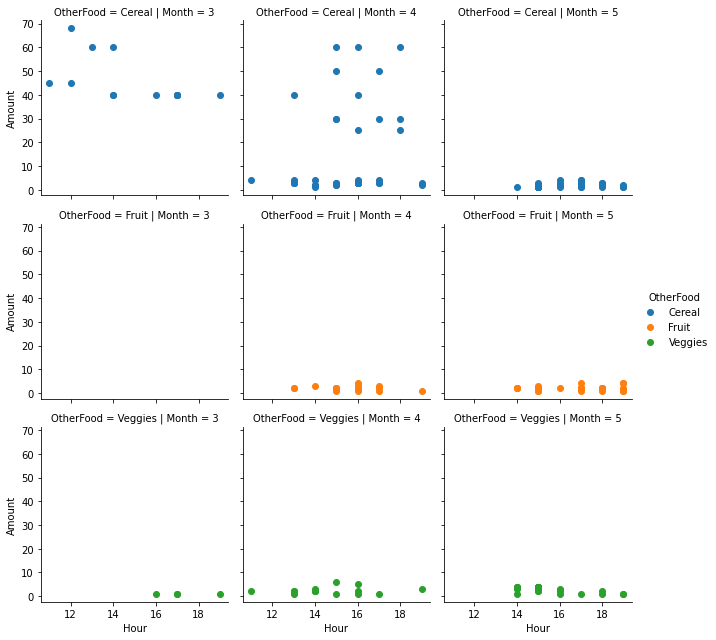

In [ ]:
g = sns.FacetGrid(feeds, row = 'OtherFood', col='Month', hue = 'OtherFood')
g = g.map(plt.scatter, 'Hour', 'Amount')
g.add_legend()
plt.show()

**Feeding Insights:**

*   Formula was mostly taken at bedtime (9pm) and wakeup time (6-7am). The volume started to pick up at his 2nd month. So Timmons was mixed fed.

*   Pumped milk was usually fed during lunch time (1-2pm), dinner time (5-6pm)and bedtime (8pm). Besides, Timmons also drank it during midnight. All that means I need to prepare pumped milk prior to these timings. My breastmilk was not that sufficient since Timmons's 3rd month.

*   Nursing usually happened around 4pm and before bedtime.

*   Cereal was the first solid food being introduced by the end of his 3rd month, followed by veggies and fruity favored cereal. Usually, it took place from 2pm - 5pm.






##2.2 Diaper

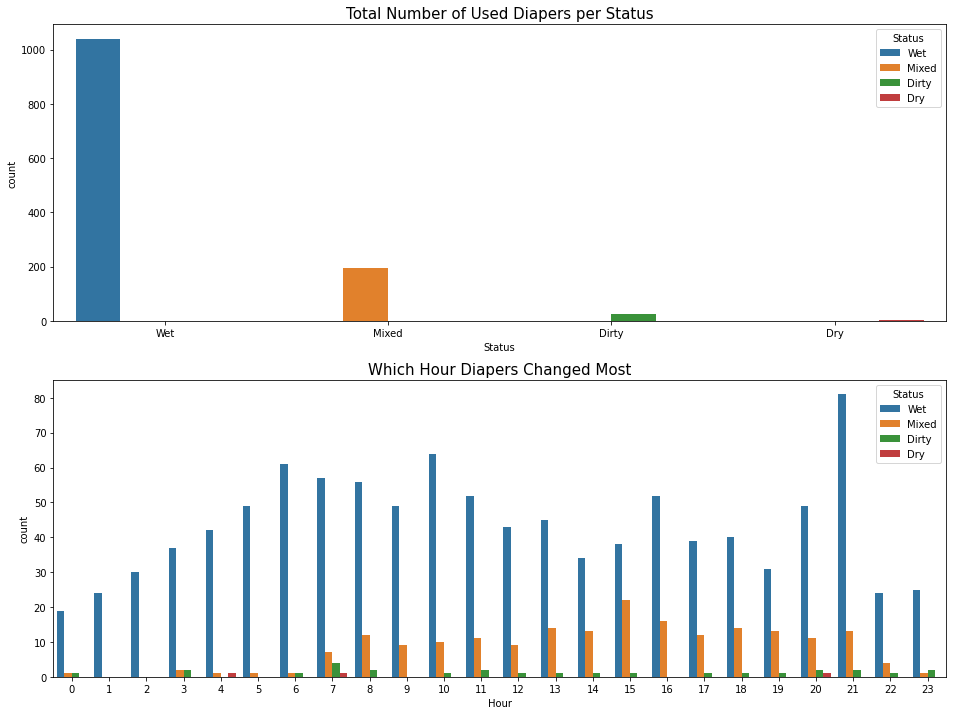

In [ ]:
_,axes = plt.subplots(2, figsize=[16,12])
sns.countplot(x='Status', hue='Status', data=diaper, ax=axes[0]) 
sns.countplot(x='Hour', hue='Status', data=diaper, ax=axes[1])
axes[0].set_title('Total Number of Used Diapers per Status', fontsize=15)
axes[1].set_title('Which Hour Diapers Changed Most', fontsize=15)
plt.show()

**Diaper Insights:**


*   Timmons prefered pooping around 3-4pm. Other than that, I usually changed a new diaper for him before bedtime, wakeup time and around 10am.



##2.3 Medicines during 6-month

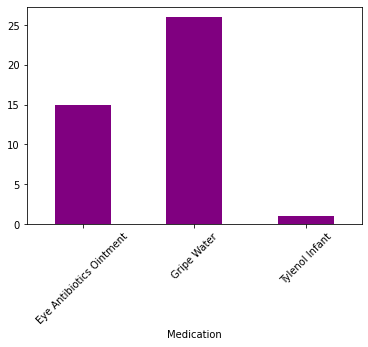

In [ ]:
med.groupby('Medication')['Time'].count().plot(kind='bar', color='purple')
plt.xticks(rotation=45)
plt.show()

**Medicine Notes:**


*   Gripe water can comfort infant's colic as Timmons was a colic sufferor.
*   Tylenol was for vaccinations.
*   Eye Antibiotics Ointment was for infant's eyes common case.





##2.4 Sleeping

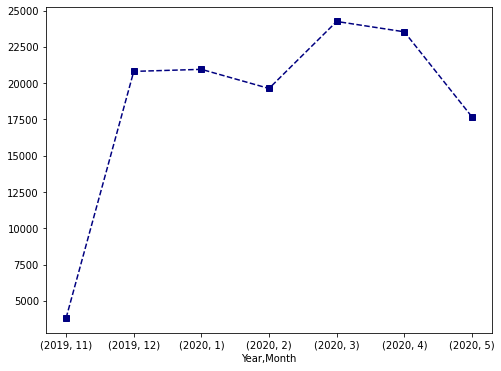

In [ ]:
plt.figure(figsize=[8, 6])
sleep.groupby(['Year', 'Month']).Dur.sum().plot(color='navy', ls='--', marker='s')
plt.show()

<Figure size 576x432 with 0 Axes>

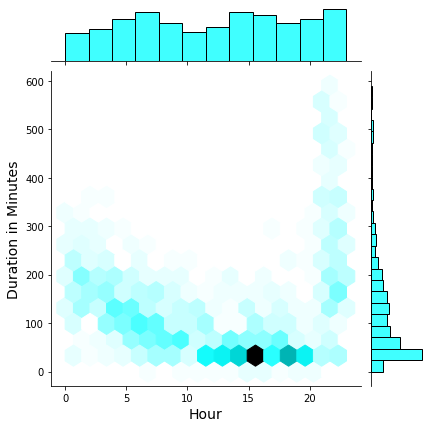

In [ ]:
plt.figure(figsize=(8, 6))
g=sns.jointplot(x=sleep['Hour'], y=sleep['Dur'], kind='hex', color='cyan')
g.set_axis_labels("Hour","Duration in Minutes", fontsize=14)
plt.show()

**Sleep Insights:**


*   Here I need to admit that I might be too tired to log accurately during Timmons's 1st month. It is supposed that infacts sleep nearly a day during their 1st month. 

*   As mentioned above, Timmons is a colic sufferor so that he could not sleep safe and sound during his first 3 months. 

*   Apart from bedtime and napping, Timmons prefered dozing out around 3-4pm.






##2.5 Mother's Pumping Breastmilk

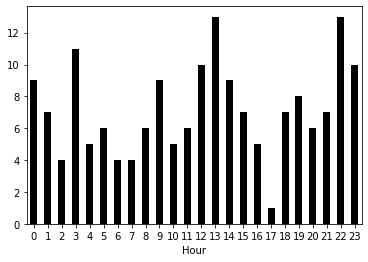

In [ ]:
pump.groupby('Hour')['Year'].count().plot(kind='bar', color='BLACK')
plt.xticks(rotation=360)
plt.show()

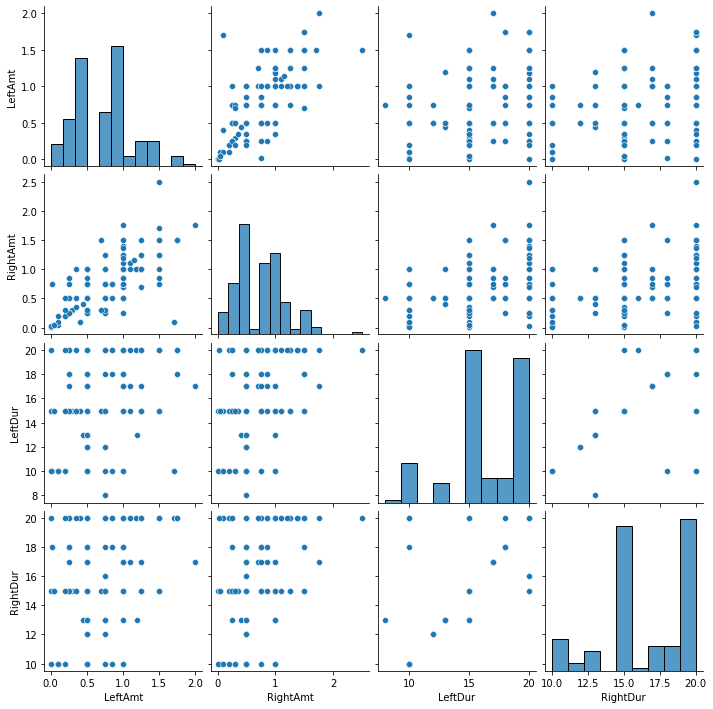

In [ ]:
df = pump[['LeftAmt', 'RightAmt', 'LeftDur', 'RightDur']]
sns.pairplot(df)
plt.show()

**My Notes:**


*   Left and right breasts almost had same volume of milk but differnt pumping minutes.
*   It was not always "the longer I pumped, the more volume of milk I had".

*   I usually pumped milk at 10pm and 1pm, followed by 3am, 11pm and 12pm.






#3. Feature Engineering

In [ ]:
print(f'''
shape of pump df is {pump.shape}
shape of formula df is {formula.shape}
shape of nursing df is {nursing.shape}
shape of pumped df is {pumped.shape}
shape of diaper df is {diaper.shape}
shape of medicine df is {med.shape}
shape of other Food df is {feeds.shape}
shape of sleep df is {sleep.shape}
''')


shape of pump df is (172, 13)
shape of formula df is (950, 8)
shape of nursing df is (258, 10)
shape of pumped df is (93, 8)
shape of diaper df is (1268, 8)
shape of medicine df is (42, 10)
shape of other Food df is (214, 11)
shape of sleep df is (1082, 8)



##3.1 Check and Replace Missing Values with Designated Values for every DataFrames

In [ ]:
pump['LeftDur'].fillna(pump['LeftDur'].mean(), inplace=True)
pump['RightDur'].fillna(pump['RightDur'].mean(), inplace=True)
pump['TotalDur'].fillna(pump['TotalDur'].mean(), inplace=True)
pump['RightAmt'].fillna(pump['RightAmt'].mean(), inplace=True)
pump.isna().sum()

Time        0
LeftDur     0
RightDur    0
TotalDur    0
LeftAmt     0
RightAmt    0
TotalAmt    0
Year        0
Month       0
Day         0
DoW         0
Hour        0
Minute      0
dtype: int64

In [ ]:
med['Description'].fillna('NA', inplace=True)
med['Amount'].fillna(med['Amount'].mean(), inplace=True)
med.isna().sum()

Time           0
Medication     0
Description    0
Amount         0
Year           0
Month          0
Day            0
DoW            0
Hour           0
Minute         0
dtype: int64

In [ ]:
feeds['Amount'].fillna(feeds['Amount'].mean(), inplace=True)
feeds['Note'].fillna('NA', inplace=True)
feeds.isna().sum()

Time         0
OtherFood    0
Amount       0
Unit         0
Note         0
Year         0
Month        0
Day          0
DoW          0
Hour         0
Minute       0
dtype: int64

##3.2 Feature Selection

Here we respectively studied 3 main factors of Timmons's health conditions and 1 factor for myself to see when the hectic times we both are so as to prepare ahead:  

*   eating (formula + nursing + pumped)
*   diaper
*   sleep

###3.2.1 Correlation

**Note:**  
"feeds dataframe" needs to be duplicated with a new one with dropped columns as the text columns will be kept for analysis later.

In [ ]:
# drop TimeStamp column for all
pump = pump.drop('Time', axis=1)
formula = formula.drop('Time', axis=1)
nursing = nursing.drop('Time', axis=1)
pumped = pumped.drop('Time', axis=1)
diaper = diaper.drop('Time', axis=1) # need to convert "status" into numeric values
med = med.drop('Time', axis=1) # need to convert "Medication" and "Description" into numeric values
feeds_train = feeds.drop(['Time','Unit', 'Note'], axis=1) # need to convert "OtherFood" into numeric values
sleep = sleep.drop('Time', axis=1)

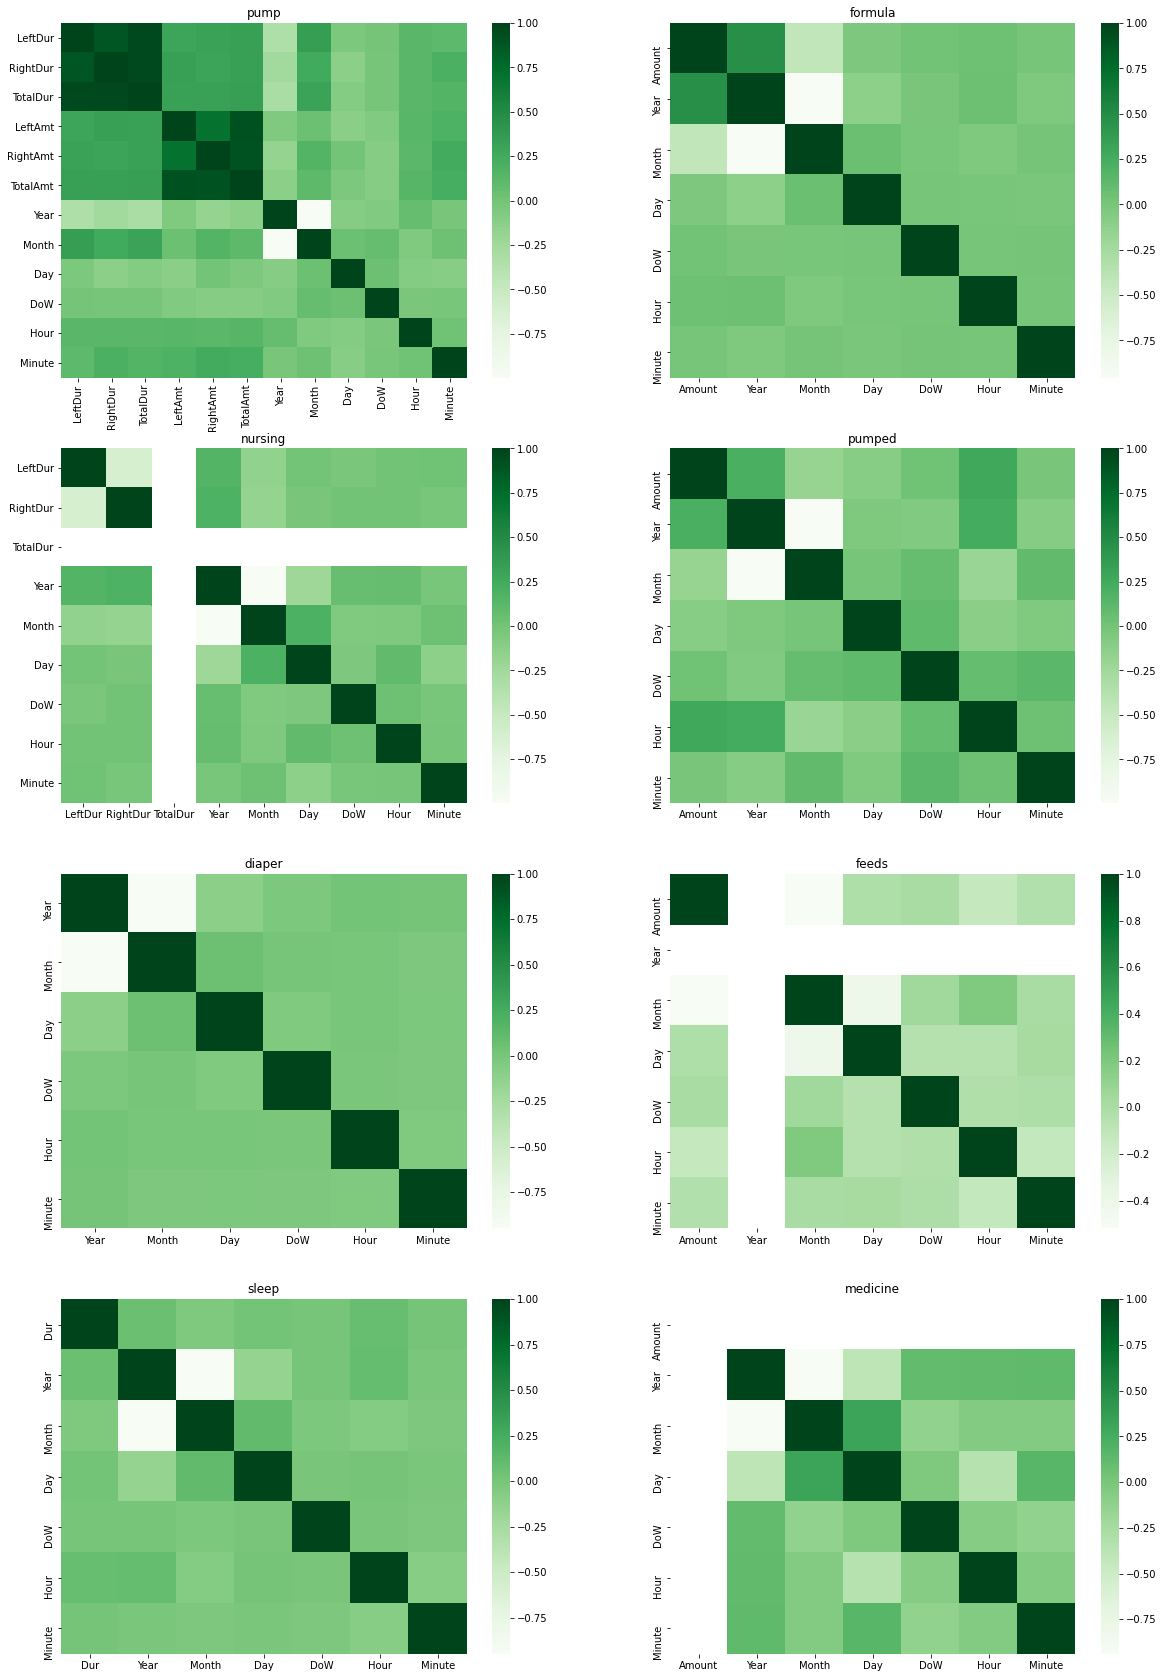

In [ ]:
f, axs = plt.subplots(4,2,figsize=(20, 30))
sns.heatmap(pump.corr(), cmap='Greens', ax=axs[0][0])
sns.heatmap(formula.corr(), cmap='Greens', ax=axs[0][1])
sns.heatmap(nursing.corr(), cmap='Greens', ax=axs[1][0])
sns.heatmap(pumped.corr(), cmap='Greens', ax=axs[1][1])
sns.heatmap(diaper.corr(), cmap="Greens", ax=axs[2][0])
sns.heatmap(feeds_train.corr(), cmap='Greens', ax=axs[2][1])
sns.heatmap(sleep.corr(), cmap='Greens', ax=axs[3][0])
sns.heatmap(med.corr(), cmap='Greens', ax=axs[3][1])
axs[0][0].set_title('pump')
axs[0][1].set_title('formula')
axs[1][0].set_title('nursing')
axs[1][1].set_title('pumped')
axs[2][0].set_title('diaper')
axs[2][1].set_title('feeds')
axs[3][0].set_title('sleep')
axs[3][1].set_title('medicine')
plt.show()

**High Correlation in such groups as below:**

*   Total Amount, Left Amount and Right Amount
*   Total Duation, Left Duration and Right Duration
*   Year and Month  


### What I am going to predict is the activity **HOUR** and **AMOUNT** if Amount is necessary.





In [ ]:
y_pum = pump[['Hour', 'TotalAmt']]
X_pum = pump.drop(columns=['Hour', 'TotalAmt'], axis=1)

y_for = formula[['Hour', 'Amount']]
X_for = formula.drop(columns=['Hour', 'Amount'], axis=1)

y_nur = nursing['Hour']
X_nur = nursing.drop(columns=['TotalDur', 'Hour'], axis=1)

y_ped = pumped['Hour']
X_ped = pumped.drop(columns=['Hour'], axis=1)

y_dia = diaper['Hour']
X_dia = diaper.drop(columns=['Hour'], axis=1) # Status

y_fee = feeds_train['Hour']
X_fee = feeds_train.drop(columns=['Hour'], axis=1) # OtherFood

y_sle = sleep['Hour']
X_sle = sleep.drop(columns=['Hour'], axis = 1)

###3.2.2 Splitting into Training Dataset and Test Dataset

In [ ]:
from sklearn import model_selection

In [ ]:
print('Formula')
X_for_train, X_for_test, y_for_train, y_for_test = model_selection.train_test_split(X_for, y_for, test_size=0.2, random_state=1)

print('Training dataset has ' + str(X_for_train.shape[0]) + ' observation with ' + str(X_for_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_for_test.shape[0]) + ' observation with ' + str(X_for_test.shape[1]) + ' features')

Formula
Training dataset has 760 observation with 5 features
Test dataset has 190 observation with 5 features


In [ ]:
print('Nursing')
X_nur_train, X_nur_test, y_nur_train, y_nur_test = model_selection.train_test_split(X_nur, y_nur, test_size=0.2, random_state=1)

print('Training dataset has ' + str(X_nur_train.shape[0]) + ' observation with ' + str(X_nur_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_nur_test.shape[0]) + ' observation with ' + str(X_nur_test.shape[1]) + ' features')

Nursing
Training dataset has 206 observation with 7 features
Test dataset has 52 observation with 7 features


In [ ]:
print('Pumped Breast Milk')
X_ped_train, X_ped_test, y_ped_train, y_ped_test = model_selection.train_test_split(X_ped, y_ped, test_size=0.2, random_state=1)

print('Training dataset has ' + str(X_ped_train.shape[0]) + ' observation with ' + str(X_ped_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_ped_test.shape[0]) + ' observation with ' + str(X_ped_test.shape[1]) + ' features')

Pumped Breast Milk
Training dataset has 74 observation with 6 features
Test dataset has 19 observation with 6 features


In [ ]:
print('Other Foods')
X_fee_train, X_fee_test, y_fee_train, y_fee_test = model_selection.train_test_split(X_fee, y_fee, test_size=0.2, random_state=1)

print('Training dataset has ' + str(X_fee_train.shape[0]) + ' observation with ' + str(X_fee_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_fee_test.shape[0]) + ' observation with ' + str(X_fee_test.shape[1]) + ' features')

Other Foods
Training dataset has 171 observation with 7 features
Test dataset has 43 observation with 7 features


In [ ]:
print('Diaper')
X_dia_train, X_dia_test, y_dia_train, y_dia_test = model_selection.train_test_split(X_dia, y_dia, test_size=0.2, random_state=1)

print('Training dataset has ' + str(X_dia_train.shape[0]) + ' observation with ' + str(X_dia_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_dia_test.shape[0]) + ' observation with ' + str(X_dia_test.shape[1]) + ' features')

Diaper
Training dataset has 1014 observation with 6 features
Test dataset has 254 observation with 6 features


In [ ]:
print('Pump')
X_pum_train, X_pum_test, y_pum_train, y_pum_test = model_selection.train_test_split(X_pum, y_pum, test_size=0.2, random_state=1)

print('Training dataset has ' + str(X_pum_train.shape[0]) + ' observation with ' + str(X_pum_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_pum_test.shape[0]) + ' observation with ' + str(X_pum_test.shape[1]) + ' features')

Pump
Training dataset has 137 observation with 10 features
Test dataset has 35 observation with 10 features


In [ ]:
print('Sleep')
X_sle_train, X_sle_test, y_sle_train, y_sle_test = model_selection.train_test_split(X_sle, y_sle, test_size=0.2, random_state=1)

print('Training dataset has ' + str(X_sle_train.shape[0]) + ' observation with ' + str(X_sle_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_sle_test.shape[0]) + ' observation with ' + str(X_sle_test.shape[1]) + ' features')

Sleep
Training dataset has 865 observation with 6 features
Test dataset has 217 observation with 6 features


In [ ]:
# Ont Hot Encoding 
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))

  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

# 'status' in diaper
status = ['Status']
enc_ohe1 = OneHotEncoder()
enc_ohe1.fit(X_dia_train[status])
X_dia_train = OneHotEncoding(X_dia_train, enc_ohe1, status)
X_dia_test = OneHotEncoding(X_dia_test, enc_ohe1, status)

# 'OtherFood' in feeds
otherFood = ['OtherFood']
enc_ohe2 = OneHotEncoder()
enc_ohe2.fit(X_fee_train[otherFood])
X_fee_train = OneHotEncoding(X_fee_train, enc_ohe2, otherFood)
X_fee_test = OneHotEncoding(X_fee_test, enc_ohe2, otherFood)

In [ ]:
X_dia_train.head()

,Year,Month,Day,DoW,Minute,Status_Dirty,Status_Dry,Status_Mixed,Status_Wet
0,2020,3,9,0,48,0.0,0.0,1.0,0.0
1,2020,4,8,2,24,0.0,0.0,0.0,1.0
2,2020,5,12,1,54,0.0,0.0,0.0,1.0
3,2020,4,17,4,27,0.0,0.0,0.0,1.0
4,2020,1,15,2,4,0.0,0.0,0.0,1.0


In [ ]:
X_fee_train.head()

,Amount,Year,Month,Day,DoW,Minute,OtherFood_Cereal,OtherFood_Fruit,OtherFood_Veggies
0,1.000000,2020,5,15,4,30,1.0,0.0,0.0
1,1.000000,2020,3,29,6,0,0.0,0.0,1.0
2,1.000000,2020,5,19,1,9,0.0,1.0,0.0
3,2.000000,2020,5,12,1,0,0.0,1.0,0.0
4,8.436782,2020,5,17,6,30,0.0,0.0,1.0


###3.2.3 StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(X_ped_train[['Amount']]) 
X_ped_train[['Amount']] = scaler1.transform(X_ped_train[['Amount']])
X_ped_test[['Amount']] = scaler1.transform(X_ped_test[['Amount']])

scaler2 = StandardScaler()
scaler2.fit(X_fee_train[['Amount']]) 
X_fee_train[['Amount']] = scaler2.transform(X_fee_train[['Amount']])
X_fee_test[['Amount']] = scaler2.transform(X_fee_test[['Amount']])

In [ ]:
X_ped_train.head()

,Amount,Year,Month,Day,DoW,Minute
73,-0.065987,2019,11,30,5,5
48,0.356286,2019,12,8,6,10
19,-1.179252,2020,1,16,3,56
87,-0.027598,2019,11,27,2,19
36,-1.179252,2019,12,18,2,45


In [ ]:
X_fee_train.head()

,Amount,Year,Month,Day,DoW,Minute,OtherFood_Cereal,OtherFood_Fruit,OtherFood_Veggies
0,-0.557568,2020,5,15,4,30,1.0,0.0,0.0
1,-0.557568,2020,3,29,6,0,0.0,0.0,1.0
2,-0.557568,2020,5,19,1,9,0.0,1.0,0.0
3,-0.490186,2020,5,12,1,0,0.0,1.0,0.0
4,-0.056462,2020,5,17,6,30,0.0,0.0,1.0


#4. Supervised Model Training

*   Tiny sizes of datasets will cause the expected values being far from the real values. So I just informally and indiscreetly built  models for predictions without model scores provided. Besides, small datasets are only applied with simplest model to avoid overfitting. 

*   Here are just several little simple ML algorithmns (Linear Regresiion from Scikit-Learn) for predicitons and see how codes execute.



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# predict for formula
le1 = LinearRegression(n_jobs=2) # 2 target variables
le1.fit(X_for_train, y_for_train)
for_pred = le1.predict(X_for_test)

# Predicted Formula Amount at Predicted Hours
for_hour_pred = for_pred[:, 0] 
for_amt_pred = for_pred[:, 1] 

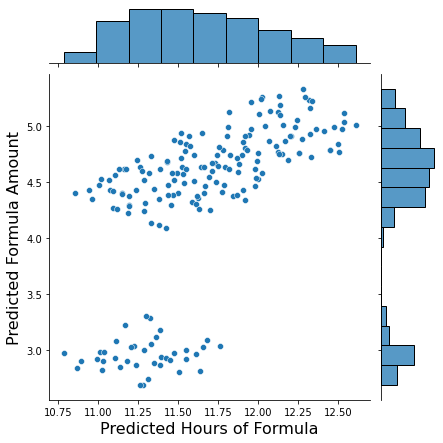

In [ ]:
ax = sns.jointplot(data=for_pred, x=for_pred[:, 0], y=for_pred[:, 1])
ax.set_axis_labels(xlabel='Predicted Hours of Formula', ylabel = 'Predicted Formula Amount', fontsize=16)
plt.show()

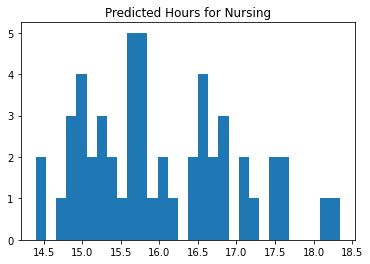

In [ ]:
# predict for nursing
le2 = LinearRegression()
le2.fit(X_nur_train, y_nur_train)
nur_pred = le2.predict(X_nur_test)

# plot predictions
plt.hist(nur_pred, bins=30)
plt.title('Predicted Hours for Nursing')
plt.show()

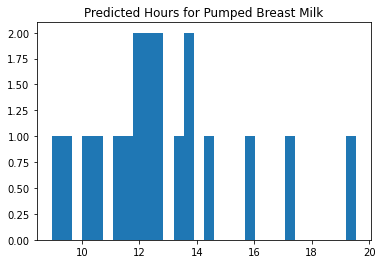

In [ ]:
# predict for pumped
le3 = LinearRegression()
le3.fit(X_ped_train, y_ped_train)
ped_pred = le3.predict(X_ped_test)

# plot predictions
plt.hist(ped_pred, bins=30)
plt.title('Predicted Hours for Pumped Breast Milk')
plt.show()

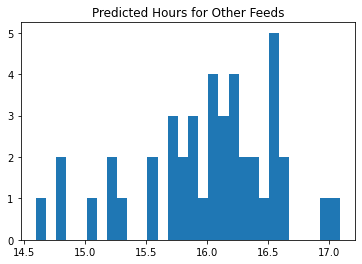

In [ ]:
# predict for other feeds
le4 = LinearRegression()
le4.fit(X_fee_train, y_fee_train)
fee_pred = le4.predict(X_fee_test)

# plot predictions
plt.hist(fee_pred, bins=30)
plt.title('Predicted Hours for Other Feeds')
plt.show()

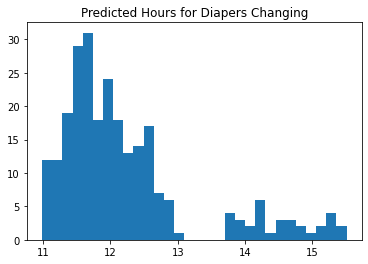

In [ ]:
# predict for diapers
le5 = LinearRegression()
le5.fit(X_dia_train, y_dia_train)
dia_pred = le5.predict(X_dia_test)

# plot predictions
plt.hist(dia_pred, bins=30)
plt.title('Predicted Hours for Diapers Changing')
plt.show()

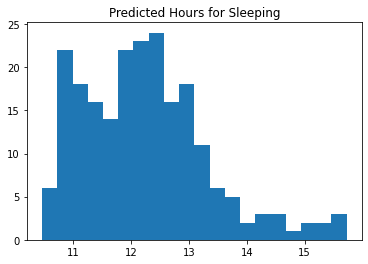

In [ ]:
# predict for sleeping
le6 = LinearRegression()
le6.fit(X_sle_train, y_sle_train)
sle_pred = le6.predict(X_sle_test)

# plot predictions
plt.hist(sle_pred, bins=20)
plt.title('Predicted Hours for Sleeping')
plt.show()

In [ ]:
# predict for Mother to pump
le7 = LinearRegression(n_jobs=2) # 2 target variables
le7.fit(X_pum_train, y_pum_train)
pum_pred = le7.predict(X_pum_test)

# Predicted Formula Amount at Predicted Hours
pum_hour_pred = pum_pred[:, 0] 
pum_amt_pred = pum_pred[:, 1] 

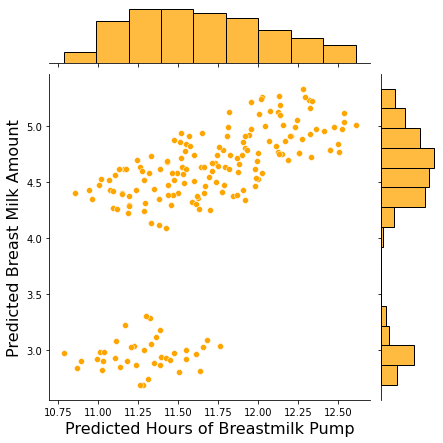

In [ ]:
ax = sns.jointplot(data=for_pred, x=for_pred[:, 0], y=for_pred[:, 1], color='orange')
ax.set_axis_labels(xlabel='Predicted Hours of Breastmilk Pump', ylabel = 'Predicted Breast Milk Amount', fontsize=16)
plt.show()

**Notes for Inaccurate Modeling with tiny datasets:**


*   As we mentioned above, sizes of all datasets are really tiny, which does not enable us to predict accurately. Because models trained on those tiny datasets are more likely to see patterns that do not exist, which results in high variance and very high error on a test set. 

*   Therefore, we could see those models do not really performs well on test datasets as there are so many hours or certain periods that are not captured even though the simplest algorithm is applied on.

**[Further Discussion] How could we deal with small datasets?**

According to [7 Effective Ways to Deal With a Small Dataset](https://hackernoon.com/7-effective-ways-to-deal-with-a-small-dataset-2gyl407s) from a Data Science Writer Kateryna Koidan, let's see what we have done and not done for modeling.


1.   **Choose simple models.**   
(Yes, we did. Linear Regression with default parameters has been applied.)
2.   **Remove outliers from data.**   
(No, we did not. Outliers for baby's activities definitly exist.)
3.   **Select relevant features.**   
(Yes, we did. We've checked correlation scores but still kept those high - socred features due to limited datasets. If domain experts, like pediatrian and gynecologist, can be discussed with, it will be better.)
4.   **Combine several models.** 
5.   **Rely on confidence intervals instead of point estimates.** 
6.   **Pool data from other possible sources.**
7.   **Apply transfer learning when possible.**  
(For the 4 - 7
 ways: No, we did not. Because we did not deep dive into modeling in this project.)


#4. Unsupervised Model for Text 
Food feeding for Timmons was recorded in "Note" column of feeds dataset. I am going to analyze what I have fed him via the methods as below:

1.   Tokenization from text 
2.   Build a TfidfVectorizer model with TF-IDF
3.   Save food terms from the model



##4.1 Tokenization of Note

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = feeds.loc[:, 'Note'].tolist()
text

['Apple, Date',
 'NA',
 'NA',
 'Potato, Tomato, Celery, Apple, Broccoli ',
 'NA',
 'NA',
 'Apple, Date',
 'NA',
 'NA',
 'Zucchini, Apple, Watermelon, Barley',
 'NA',
 'NA',
 'Apple, Broccoli ',
 'NA',
 'NA',
 'Potato, Tomato, Celery, Apple, Broccoli ',
 'NA',
 'NA',
 'Apple, Broccoli, Celery, Tomato,Potato ',
 'NA',
 'NA',
 'Potato, Celery, Tomato, Apple, Broccoli ',
 'NA',
 'NA',
 'Potato, Celery, Tomato, Pineapple, Pear ',
 'NA',
 'Chinese yam, Lotus root, Millet, Pineapple, Pear ',
 'NA',
 'NA',
 'Chinese yam, Lotus root, Millet, Pineapple, Pear',
 'NA',
 'NA',
 'Chinese yam, Lotus root, Millet, Pineapple, Pear',
 'NA',
 'NA',
 'Chinese yam, Lotus root, Millet, Pineapple, Pear ',
 'NA',
 'NA',
 'Miller,Chinese yam, Lotus root, Pineapple, Pear',
 'NA',
 'NA',
 'Pear, Pineapple ',
 'NA',
 'Chinese yam, Lotus root, Eggyolk, Millet',
 'NA',
 'Banana Apricot Peach ',
 'NA',
 'Eggyolk, Chinese yam, Lotus root, Millet',
 'NA',
 'Banana Apricot Peach',
 'NA',
 'Pumpkin Tomato Eggyolk',
 'NA

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("na")
stopwords.append("NA") 
print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 181 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
# tokenization
def tokenization(text):
  tokens = []
  # exclude stop words and tokenize the document, generate a list of string 
  for word in nltk.word_tokenize(text):
    if word.lower() not in stopwords:
      tokens.append(word.lower())

  filtered_tokens = []
  # filter out any tokens not containing ","
  for token in tokens:
    if token.isalpha(): 
      filtered_tokens.append(token)
  return filtered_tokens

In [ ]:
print(text[15])
print(tokenization(text[15]))

Potato, Tomato, Celery, Apple, Broccoli 
['potato', 'tomato', 'celery', 'apple', 'broccoli']


##4.2 TF - IDF
TF: Term Frequency 

IDF: Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### parameters for TFidVectorizer:
# max_df : maximum document frequency for the given word; those words appeared too much, which need to be abandomed.
# min_df : minimum document frequency for the given word; those words appeared too less,, which need to be abadomed.
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram.
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=20,\
                              min_df=0.01, stop_words='english',\
                              use_idf=True, tokenizer=tokenization, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(text)

In [ ]:
print(f"In summary, there were " + str(tfidf_matrix.shape[0]) + " times of taking solid food" +\
      " with " + str(tfidf_matrix.shape[1]) + " differnt kinds of food.")
tfidf_matrix

In summary, there were 214 times of taking solid food with 20 differnt kinds of food.


<214x20 sparse matrix of type '<class 'numpy.float64'>'
	with 194 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# check the parameters
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.99,
 'max_features': 20,
 'min_df': 0.01,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization>,
 'use_idf': True,
 'vocabulary': None}

**Save Terms**

In [ ]:
# terms
tfidf_terms = tfidf_model.get_feature_names()
tfidf_terms

['apple',
 'banana',
 'broccoli',
 'carrot',
 'celery',
 'chinese',
 'lotus',
 'millet',
 'pear',
 'pears',
 'pineapple',
 'potato',
 'prune',
 'pumpkin',
 'purple',
 'root',
 'spinach',
 'sweet',
 'tomato',
 'yam']